# Лабораторная работа №8. Факторный анализ.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
pd.options.display.max_columns = None
data = pd.read_csv('lab8 said.csv', sep=';', index_col=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4396 entries, 0 to 4395
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Местное время в Праге / Либуше  4396 non-null   object 
 1   T                               4396 non-null   float64
 2   Po                              4396 non-null   float64
 3   P                               4396 non-null   float64
 4   Pa                              4332 non-null   float64
 5   U                               4396 non-null   int64  
 6   DD                              4396 non-null   object 
 7   Ff                              4396 non-null   int64  
 8   ff10                            27 non-null     float64
 9   ff3                             116 non-null    float64
 10  N                               2755 non-null   object 
 11  WW                              4396 non-null   object 
 12  W1                              11

In [ ]:
c= []
for i in data['Местное время в Праге / Либуше']:
  if '07:00' in i:
    c.append(i)

df = data.loc[data['Местное время в Праге / Либуше'].isin(c)]
df['Местное время в Праге / Либуше'] = df['Местное время в Праге / Либуше'].str.slice(stop=-6)
df

<ipython-input-62-833cf8c58a58>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Местное время в Праге / Либуше'] = df['Местное время в Праге / Либуше'].str.slice(stop=-6)


,Местное время в Праге / Либуше,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
8,24.12.2024,1.0,738.2,766.6,1.9,84,"Ветер, дующий с западо-юго-запада",2,NaN,NaN,"90 или более, но не 100%",Состояние неба в общем не изменилось.,NaN,NaN,0.7,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.","90 или более, но не 100%",1000-1500,NaN,NaN,40.0,-1.4,0.1,12,Поверхность почвы влажная.,-2.0,NaN,NaN
32,23.12.2024,1.7,728.1,756.0,0.8,80,"Ветер, дующий с запада",2,NaN,NaN,"90 или более, но не 100%",Состояние неба в общем не изменилось.,NaN,NaN,0.4,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.","90 или более, но не 100%",600-1000,NaN,NaN,50.0,-1.4,2.0,12,Поверхность почвы влажная.,-2.0,NaN,NaN
56,22.12.2024,6.3,724.9,752.2,-2.1,75,"Ветер, дующий с юго-запада",4,NaN,12.0,"90 или более, но не 100%",Дождь (незамерзающий) неливневый.,NaN,NaN,4.6,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",50%.,600-1000,"Высококучевые, просвечивающие или плотные в дв...",NaN,50.0,2.2,0.2,12,Поверхность почвы влажная.,3.0,NaN,NaN
80,21.12.2024,0.9,738.1,766.4,-0.3,73,"Ветер, дующий с юго-юго-запада",3,NaN,NaN,40%.,Состояние неба в общем не изменилось.,NaN,NaN,0.7,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",20–30%.,1000-1500,Клочья (часто чечевицеобразные) высококучевых ...,"Перистых, перисто-кучевых или перисто-слоистых...",45.0,-3.4,Осадков нет,12,Поверхность почвы влажная.,-2.0,NaN,NaN
104,20.12.2024,4.2,731.5,759.3,1.8,69,"Ветер, дующий с запада",3,8.0,14.0,"90 или более, но не 100%",Состояние неба в общем не изменилось.,NaN,NaN,4.2,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.","90 или более, но не 100%",1000-1500,NaN,NaN,60.0,-1.0,0.8,12,Поверхность почвы влажная.,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4292,28.06.2024,20.7,733.8,760.0,0.9,76,"Ветер, дующий с западо-юго-запада",2,NaN,NaN,"10% или менее, но не 0",Состояние неба в общем не изменилось.,NaN,NaN,17.1,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...","10% или менее, но не 0","2500 или более, или облаков нет.","Высококучевые просвечивающие, полосами, либо о...","Перистые нитевидные, иногда когтевидные, не ра...",50.0,16.3,Осадков нет,12,Поверхность почвы влажная.,14.0,NaN,NaN
4316,27.06.2024,21.4,731.8,757.9,0.3,71,"Ветер, дующий с западо-юго-запада",2,NaN,NaN,"90 или более, но не 100%",Состояние неба в общем не изменилось.,NaN,NaN,18.0,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...","10% или менее, но не 0","2500 или более, или облаков нет.",Клочья (часто чечевицеобразные) высококучевых ...,Перистые плотные в виде клочьев или скрученных...,29.0,15.8,Осадков нет,12,"Cухая (без трещин, заметного количества пыли и...",15.0,NaN,NaN
4340,26.06.2024,23.0,733.3,759.3,-0.1,62,"Ветер, дующий с востока",2,NaN,NaN,50%.,Состояние неба в общем не изменилось.,NaN,NaN,18.7,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...","10% или менее, но не 0","2500 или более, или облаков нет.","Высококучевые просвечивающие, расположенные на...","Перистые нитевидные, иногда когтевидные, не ра...",40.0,15.3,Осадков нет,12,"Cухая (без трещин, заметного количества пыли и...",16.0,NaN,NaN
4364,25.06.2024,18.8,737.0,763.5,NaN,62,"Ветер, дующий с севера",2,NaN,NaN,Облаков нет.,Состояние неба в общем не изменилось.,NaN,NaN,12.7,NaN,NaN,NaN,NaN,NaN,NaN,50.0,11.4,Осадков нет,12,"Cухая (без трещин, заметного количества пыли и...",8.0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, 8 to 4388
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Местное время в Праге / Либуше  184 non-null    object 
 1   T                               184 non-null    float64
 2   Po                              184 non-null    float64
 3   P                               184 non-null    float64
 4   Pa                              181 non-null    float64
 5   U                               184 non-null    int64  
 6   DD                              184 non-null    object 
 7   Ff                              184 non-null    int64  
 8   ff10                            1 non-null      float64
 9   ff3                             5 non-null      float64
 10  N                               184 non-null    object 
 11  WW                              184 non-null    object 
 12  W1                              1 non-nu

уберем нулевые: E', sss, Tx, W1, W2, ff3, ff10

In [ ]:
df = df.drop(labels=["E'", 'sss', 'Tx', 'W1', 'W2', 'ff3', 'ff10', 'DD', 'WW', 'Cl', 'E', 'Ch', 'Cm', 'H', 'tR', 'N', 'Nh', 'RRR'], axis=1)
df.reset_index(drop=True, inplace=True)
df

,Местное время в Праге / Либуше,T,Po,P,Pa,U,Ff,Tn,VV,Td,Tg
0,24.12.2024,1.0,738.2,766.6,1.9,84,2,0.7,40.0,-1.4,-2.0
1,23.12.2024,1.7,728.1,756.0,0.8,80,2,0.4,50.0,-1.4,-2.0
2,22.12.2024,6.3,724.9,752.2,-2.1,75,4,4.6,50.0,2.2,3.0
3,21.12.2024,0.9,738.1,766.4,-0.3,73,3,0.7,45.0,-3.4,-2.0
4,20.12.2024,4.2,731.5,759.3,1.8,69,3,4.2,60.0,-1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
179,28.06.2024,20.7,733.8,760.0,0.9,76,2,17.1,50.0,16.3,14.0
180,27.06.2024,21.4,731.8,757.9,0.3,71,2,18.0,29.0,15.8,15.0
181,26.06.2024,23.0,733.3,759.3,-0.1,62,2,18.7,40.0,15.3,16.0
182,25.06.2024,18.8,737.0,763.5,NaN,62,2,12.7,50.0,11.4,8.0


In [ ]:
df['VV'] = df['VV'].astype(float)
df = df.drop(labels='Местное время в Праге / Либуше', axis=1)
df = df.fillna(0)
print(df.var(numeric_only = True))
df.info()

T      56.349458
Po     31.848767
P      37.635071
Pa      0.761259
U     122.649531
Ff      0.936089
Tn     43.891390
VV    295.004057
Td     42.100492
Tg     41.882128
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       184 non-null    float64
 1   Po      184 non-null    float64
 2   P       184 non-null    float64
 3   Pa      184 non-null    float64
 4   U       184 non-null    int64  
 5   Ff      184 non-null    int64  
 6   Tn      184 non-null    float64
 7   VV      184 non-null    float64
 8   Td      184 non-null    float64
 9   Tg      184 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 14.5 KB


<Axes: >

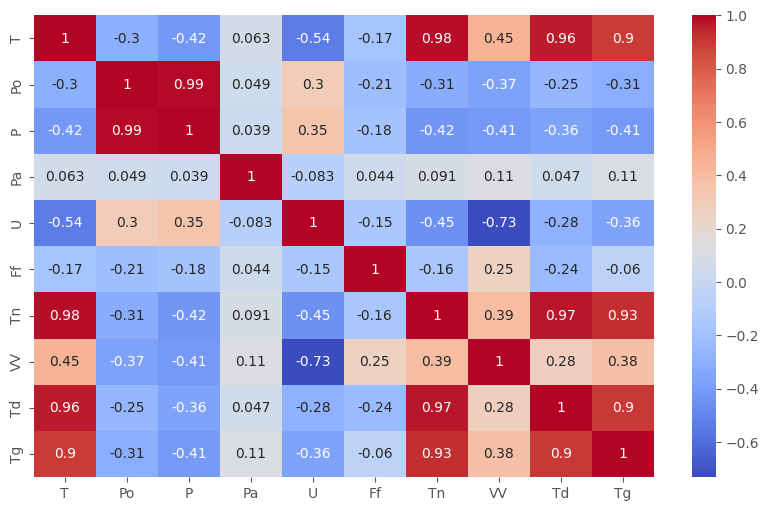

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [ ]:
print(df)

        T     Po      P   Pa   U  Ff    Tn    VV    Td    Tg
0     1.0  738.2  766.6  1.9  84   2   0.7  40.0  -1.4  -2.0
1     1.7  728.1  756.0  0.8  80   2   0.4  50.0  -1.4  -2.0
2     6.3  724.9  752.2 -2.1  75   4   4.6  50.0   2.2   3.0
3     0.9  738.1  766.4 -0.3  73   3   0.7  45.0  -3.4  -2.0
4     4.2  731.5  759.3  1.8  69   3   4.2  60.0  -1.0   3.0
..    ...    ...    ...  ...  ..  ..   ...   ...   ...   ...
179  20.7  733.8  760.0  0.9  76   2  17.1  50.0  16.3  14.0
180  21.4  731.8  757.9  0.3  71   2  18.0  29.0  15.8  15.0
181  23.0  733.3  759.3 -0.1  62   2  18.7  40.0  15.3  16.0
182  18.8  737.0  763.5  0.0  62   2  12.7  50.0  11.4   8.0
183  18.4  738.9  765.4  0.5  69   1  12.6  35.0  12.6   8.0

[184 rows x 10 columns]


In [ ]:
standart = StandardScaler()
df_stand = standart.fit_transform(df)

In [ ]:
plt.rcParams['figure.figsize'] = (14, 5)
pca = PCA()
pca_data = pca.fit_transform(df_stand)

stone = pca.explained_variance_ratio_

n = 1
for i in stone:
  print(f'Объемная дисперсия для {n} компонент: {i:.6f}')
  n += 1

n = 1
c = 0
print('\n\n')
for i in stone:
  c += i
  print(f'Процент объясненной дисперсии для первых {n} компонент: {c:.6f}')
  n += 1


Объемная дисперсия для 1 компонент: 0.482018
Объемная дисперсия для 2 компонент: 0.192945
Объемная дисперсия для 3 компонент: 0.124350
Объемная дисперсия для 4 компонент: 0.091838
Объемная дисперсия для 5 компонент: 0.070841
Объемная дисперсия для 6 компонент: 0.026737
Объемная дисперсия для 7 компонент: 0.009928
Объемная дисперсия для 8 компонент: 0.001300
Объемная дисперсия для 9 компонент: 0.000041
Объемная дисперсия для 10 компонент: 0.000003



Процент объясненной дисперсии для первых 1 компонент: 0.482018
Процент объясненной дисперсии для первых 2 компонент: 0.674963
Процент объясненной дисперсии для первых 3 компонент: 0.799312
Процент объясненной дисперсии для первых 4 компонент: 0.891150
Процент объясненной дисперсии для первых 5 компонент: 0.961991
Процент объясненной дисперсии для первых 6 компонент: 0.988728
Процент объясненной дисперсии для первых 7 компонент: 0.998656
Процент объясненной дисперсии для первых 8 компонент: 0.999956
Процент объясненной дисперсии для первых 9

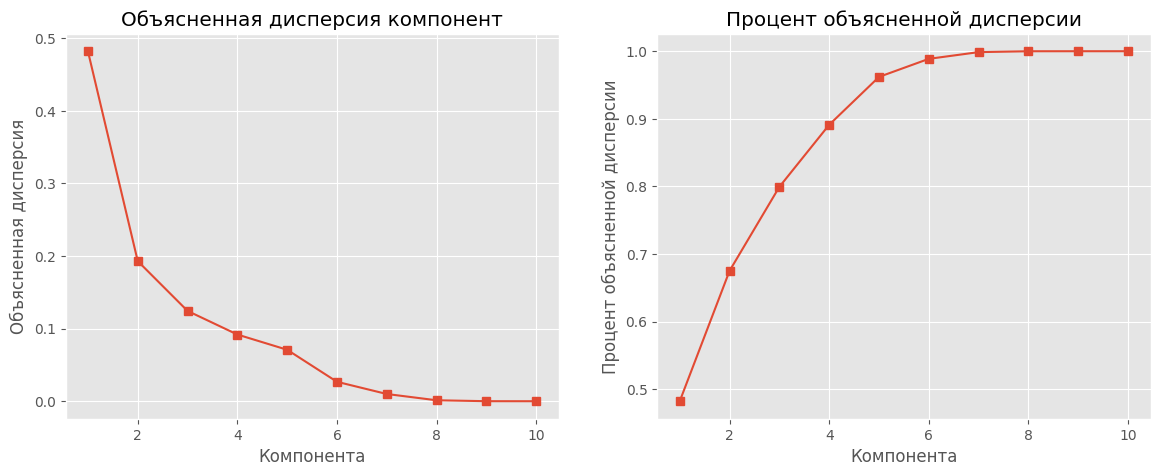

In [ ]:
plt.subplot(1, 2, 1)
plt.plot (range(1, 11), stone, marker='s')
plt.title('Объясненная дисперсия компонент')
plt.xlabel ('Компонента')
plt.ylabel ('Объясненная дисперсия')

plt.subplot(1, 2, 2)
plt.plot (range(1, 11), np.cumsum(stone), marker='s')
plt.title('Процент объясненной дисперсии')
plt.xlabel ('Компонента')
plt.ylabel ('Процент объясненной дисперсии')
plt.show ()

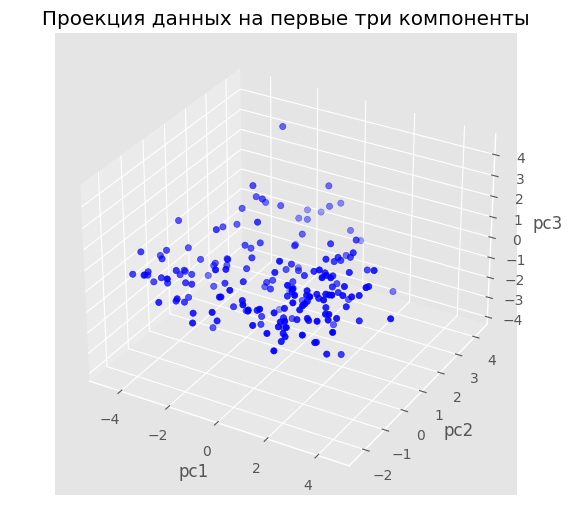

In [ ]:
pca = PCA(n_components=3)
pca.fit(df_stand)
pca_data = pca.transform(df_stand)

fig = plt.figure(figsize=(9, 6))
graf = fig.add_subplot (111, projection='3d')
graf.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c='b', marker='o')
graf.set_title('     Проекция данных на первые три компоненты     ')
graf.set_xlabel('pc1')
graf.set_ylabel('pc2')
graf.set_zlabel('pc3')
plt.show()

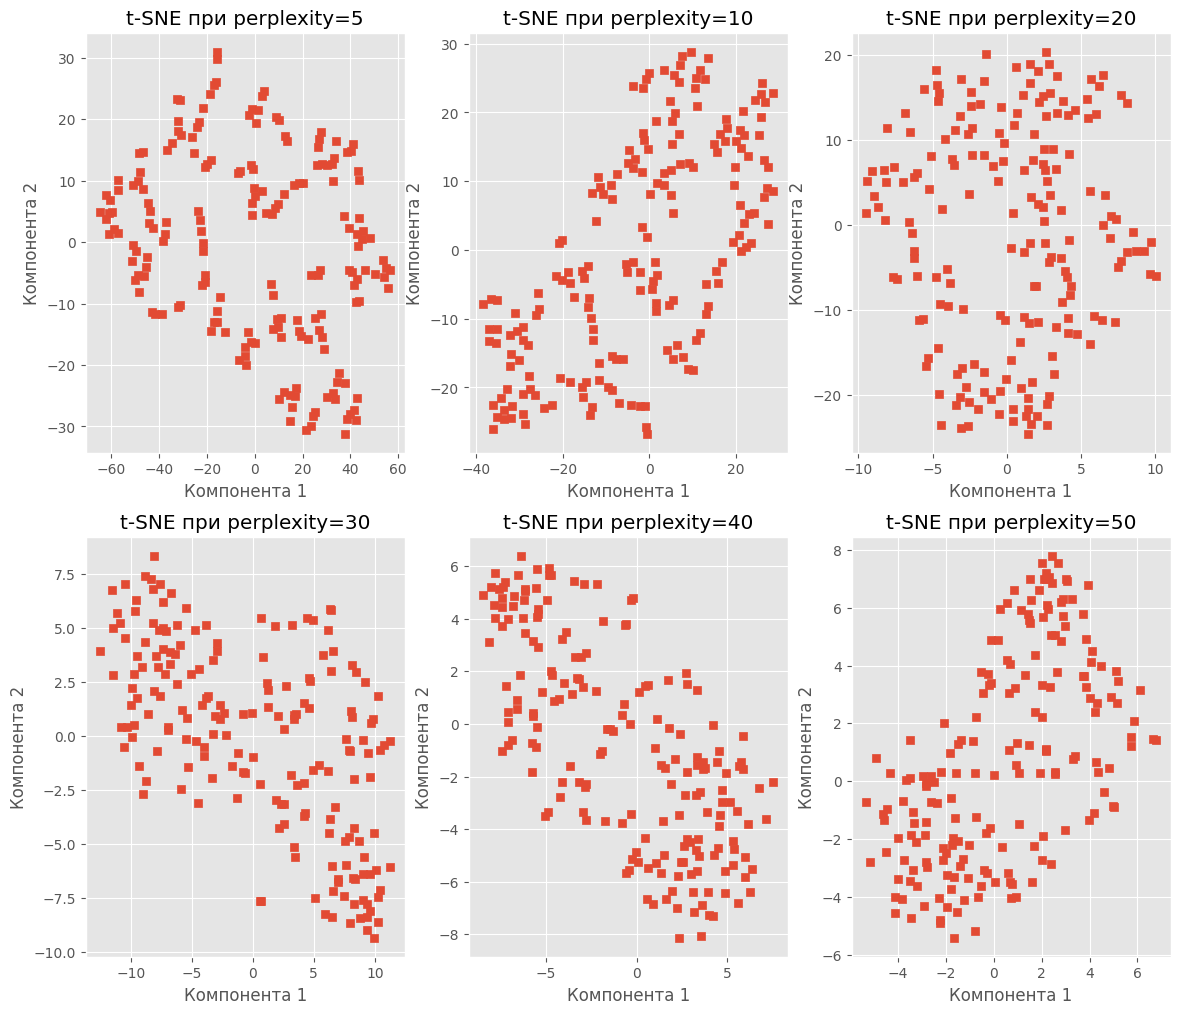

In [ ]:
plt.rcParams['figure.figsize'] = (14, 12)
perplex = [5, 10, 20, 30, 40, 50]

c = 1
for i in perplex:
  t_sne = TSNE(n_components=2, perplexity=i, random_state=7)
  t_sne_data = t_sne.fit_transform(df_stand)
  plt.subplot(2, 3, c)
  c += 1
  plt.scatter(t_sne_data[:,0], t_sne_data[:,1], marker='s')
  plt.title(f't-SNE при perplexity={i}')
  plt.xlabel ('Компонента 1')
  plt.ylabel ('Компонента 2')
plt.show ()